In [82]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

In [257]:
campaign_events = pd.read_csv("/Users/ryanchou/Documents/cs216/campaign_events_again.csv")
campaign_events = campaign_events.fillna(0)
print(campaign_events.describe())
campaign_events.loc[51, "Total"] = 1164
campaign_events["Total"] = campaign_events["Total"].astype(int)
campaign_events = campaign_events[campaign_events["Total"] > 1]
campaign_events["Total"] = campaign_events["2008 events"] + campaign_events["2012 events"] + campaign_events["2016 events"] + campaign_events["2020 events"]
campaign_events = campaign_events[campaign_events["State"] != "Total"]
campaign_events.loc[20] = campaign_events.sum()
campaign_events.loc[20, "State"] = "Sum"
campaign_events = campaign_events.set_index("State")
print(campaign_events)


top08 = campaign_events["2008 events"].iloc[0:20].nlargest(10)
top12 = campaign_events["2012 events"].iloc[0:20].nlargest(10)
top16 = campaign_events["2016 events"].iloc[0:20].nlargest(10)
top20 = campaign_events["2020 events"].iloc[0:20].nlargest(10)

state_mask = pd.concat([top08, top12, top16, top20]).index.unique()
campaign_events_t10 = pd.DataFrame(campaign_events[campaign_events.index.isin(state_mask)])
print(campaign_events_t10.head())


       2008 events  2012 events  2016 events  2020 events
count    52.000000    52.000000    52.000000    52.000000
mean     11.538462     9.730769    15.346154     8.153846
std      42.677294    36.853241    56.556716    30.257966
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     1.000000     0.000000
75%       8.000000     0.250000     4.750000     3.250000
max     300.000000   253.000000   399.000000   212.000000
                2008 events  2012 events  2016 events  2020 events   Total
State                                                                     
Ohio                   62.0         73.0         48.0         13.0   196.0
Florida                46.0         40.0         71.0         31.0   188.0
Pennsylvania           40.0          5.0         54.0         47.0   146.0
North Carolina         15.0          3.0         55.0         25.0    98.0
Virginia               23.0 

In [90]:
pretrump = pd.DataFrame(campaign_events[["2008 events", "2012 events"]])
pretrump["avg_count_pt"] = (pretrump["2008 events"] + pretrump["2012 events"])/2
trump = pd.DataFrame(campaign_events[["2016 events", "2020 events"]])
trump["avg_count_t"] = (trump["2016 events"] + trump["2020 events"])/2
print(pretrump.head())
print(trump.head())

                2008 events  2012 events  avg_count_pt
State                                                 
Ohio                   62.0         73.0          67.5
Florida                46.0         40.0          43.0
Pennsylvania           40.0          5.0          22.5
North Carolina         15.0          3.0           9.0
Virginia               23.0         36.0          29.5
                2016 events  2020 events  avg_count_t
State                                                
Ohio                   48.0         13.0         30.5
Florida                71.0         31.0         51.0
Pennsylvania           54.0         47.0         50.5
North Carolina         55.0         25.0         40.0
Virginia               23.0          1.0         12.0


In [246]:
chi2_vis, p_vis, dof_vis, expected_visited = chi2_contingency(campaign_events.iloc[:,0:4].drop(index = "Sum"))
print(chi2_vis)
print(p_vis)
print(dof_vis)
chi_square_val_visited = pd.DataFrame(expected_visited, index = campaign_events.drop(index = "Sum").index)
chi_square_val_visited["2008_chi"] = chi_square_val_visited[0]
chi_square_val_visited["2012_chi"] = chi_square_val_visited[1]
chi_square_val_visited["2016_chi"] = chi_square_val_visited[2]
chi_square_val_visited["2020_chi"] = chi_square_val_visited[3]
chi_square_val_visited = chi_square_val_visited[["2008","2012","2016","2020"]]
print(chi_square_val_visited)

399.5302050693715
6.496959458432793e-53
57


KeyError: "None of [Index(['2008', '2012', '2016', '2020'], dtype='object')] are in the [columns]"

In [168]:
chi2_t10, p_t10, dof_t10, expected_t10 = chi2_contingency(campaign_events_t10.iloc[:,0:4])
print(chi2_t10)
print(p_t10)
print(dof_t10)
chi_square_val_t10 = pd.DataFrame(expected_t10, index = campaign_events_t10.index)
chi_square_val_t10["2008_chi"] = chi_square_val_t10[0]
chi_square_val_t10["2012_chi"] = chi_square_val_t10[1]
chi_square_val_t10["2016_chi"] = chi_square_val_t10[2]
chi_square_val_t10["2020_chi"] = chi_square_val_t10[3]
chi_square_val_t10 = chi_square_val_t10[["2008_chi","2012_chi","2016_chi","2020_chi"]]
chi_square_val_t10

353.6153995031145
6.746463140283177e-51
42


,2008_chi,2012_chi,2016_chi,2020_chi
State,,,,
Ohio,48.737030,44.354204,66.969589,35.939177
Florida,46.747764,42.543828,64.236136,34.472272
Pennsylvania,36.304114,33.039356,49.885510,26.771020
North Carolina,24.368515,22.177102,33.484794,17.969589
Virginia,20.638640,18.782648,28.359571,15.219141
Colorado,15.416816,14.030411,21.184258,11.368515
Iowa,14.919499,13.577818,20.500894,11.001789
Wisconsin,14.422182,13.125224,19.817531,10.635063
Michigan,13.427549,12.220036,18.450805,9.901610


/var/folders/0_/59tjfwxn6094jd7_6lmznpt80000gn/T/ipykernel_72615/3881708104.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(chi_and_actual, x = "Year", y = state, kind = "bar", hue = "Chi Value", ci = None)
/var/folders/0_/59tjfwxn6094jd7_6lmznpt80000gn/T/ipykernel_72615/3881708104.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(chi_and_actual, x = "Year", y = state, kind = "bar", hue = "Chi Value", ci = None)
/var/folders/0_/59tjfwxn6094jd7_6lmznpt80000gn/T/ipykernel_72615/3881708104.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(chi_and_actual, x = "Year", y = state, kind = "bar", hue = "Chi Value", ci = None)
/var/folders/0_/59tjfwxn6094jd7_6lmznpt80000gn/T/ipykernel_72615/3881708104.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns

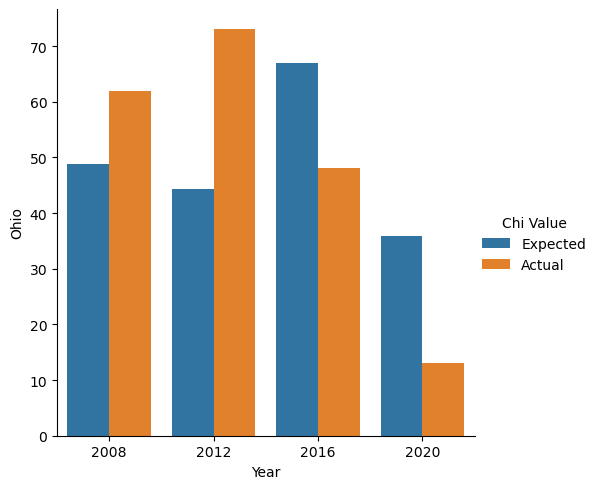

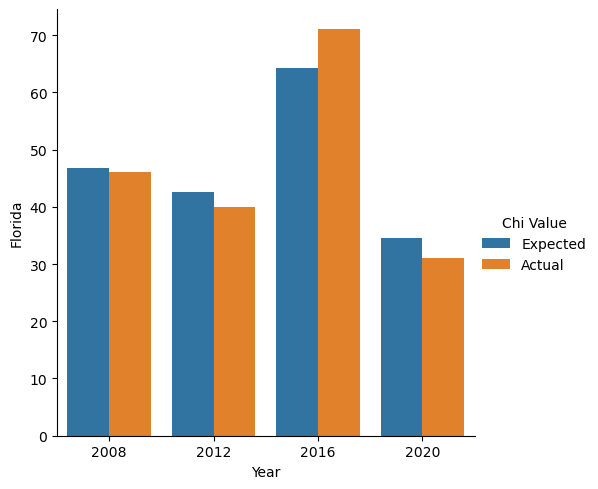

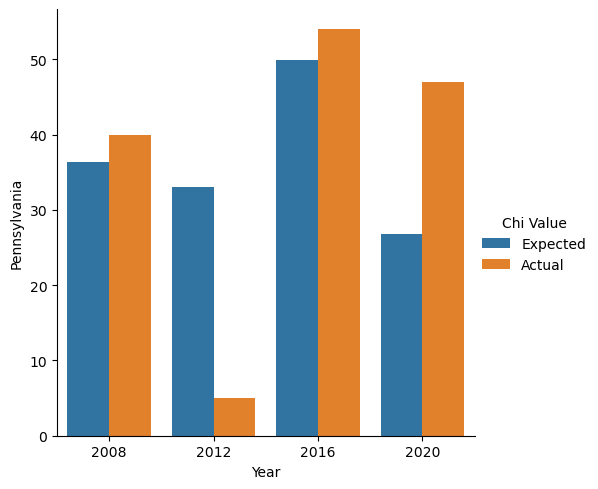

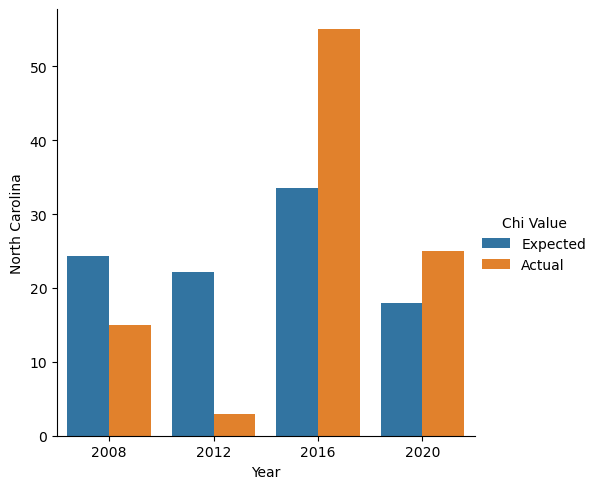

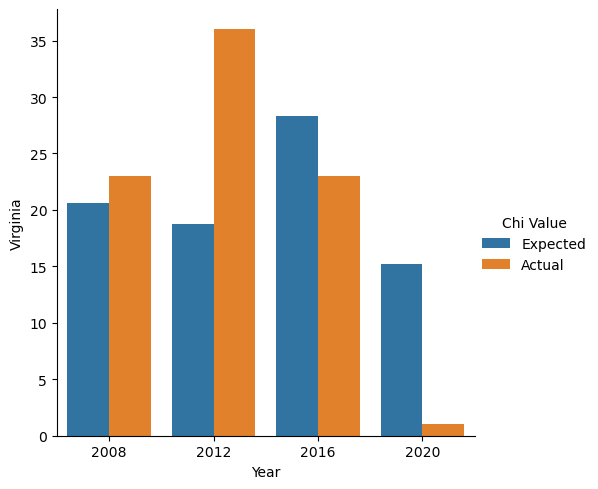

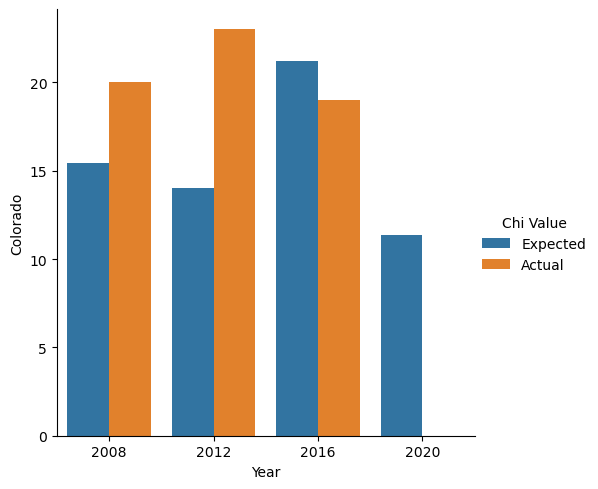

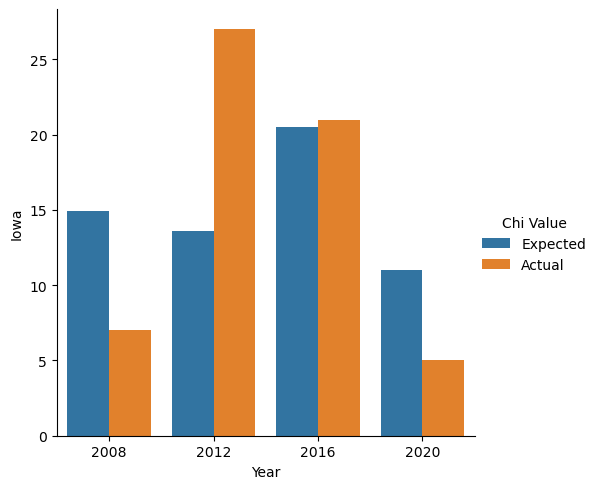

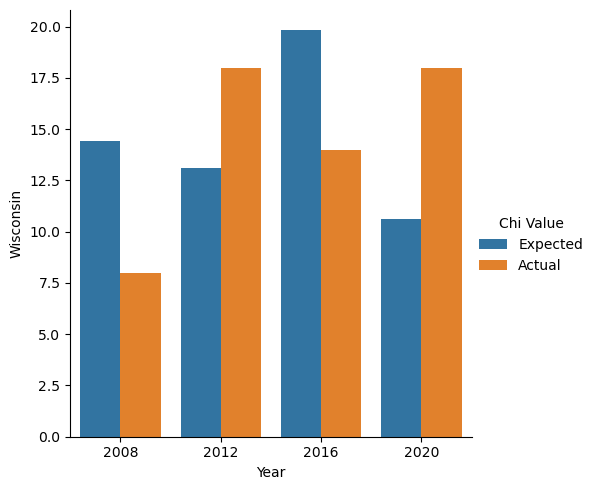

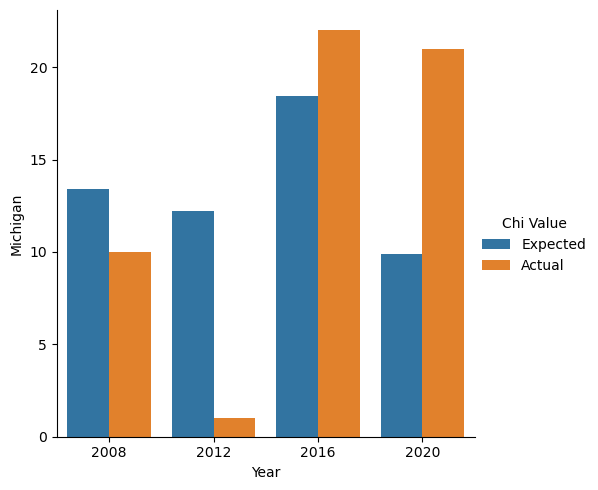

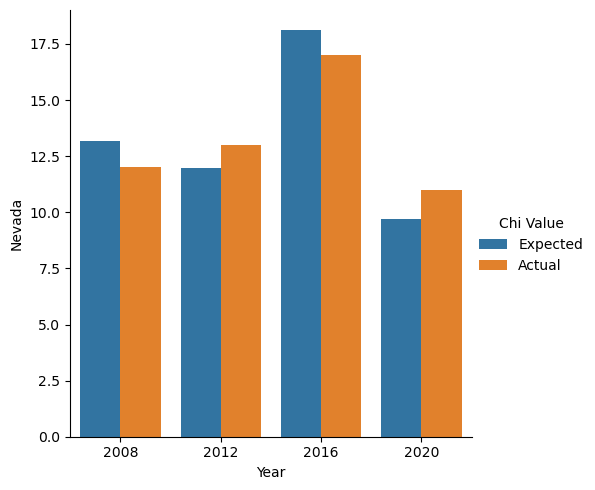

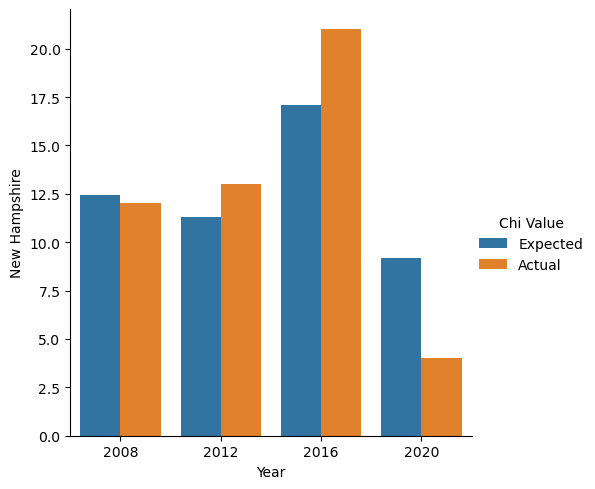

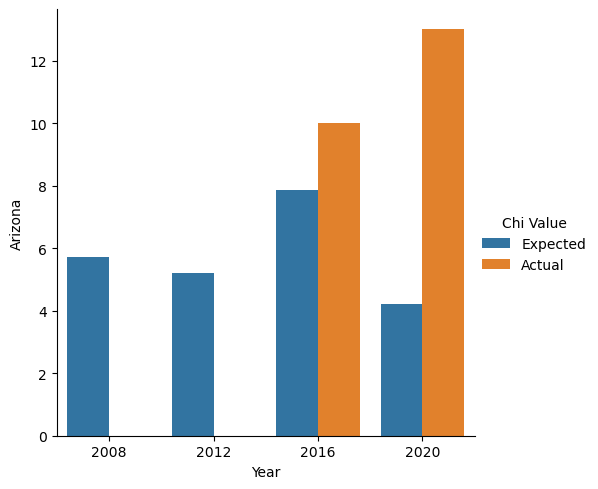

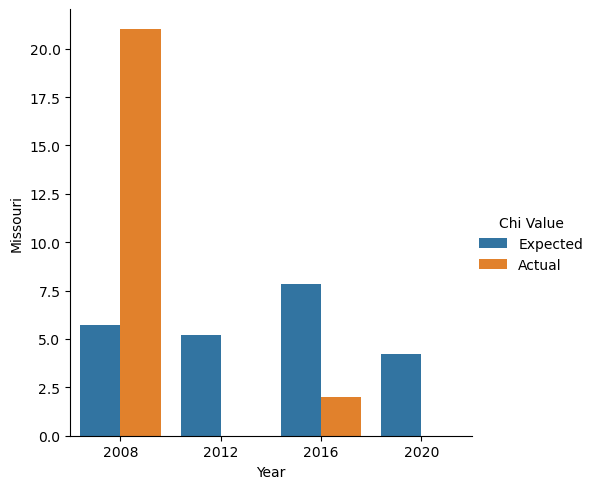

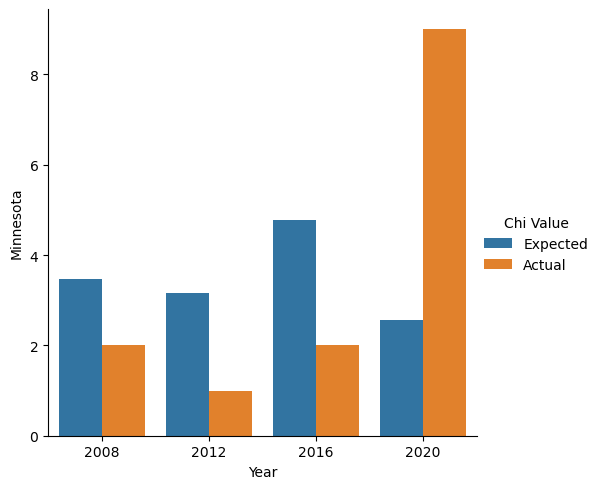

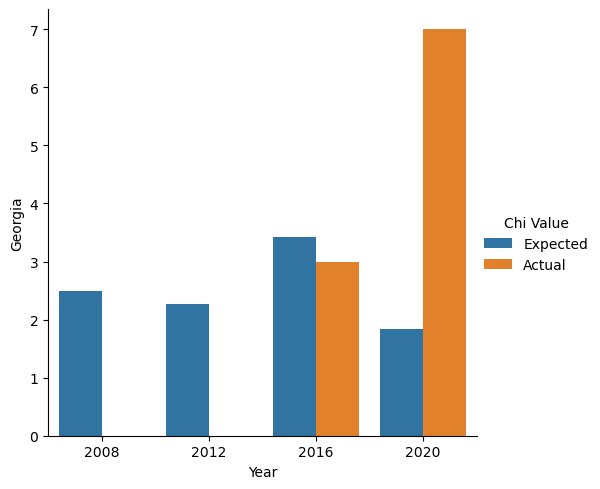

In [252]:
for state in chi_square_val_t10.index:
    chi_reorg = chi_square_val_t10.loc[state,:].reset_index()
    chi_reorg[["Year", "chi"]] = chi_reorg["index"].str.split("_", expand = True)
    chi_reorg = chi_reorg.drop(columns = "index")

    actual_reorg = campaign_events_t10.loc[state].iloc[0:4].reset_index()
    actual_reorg[["Year", "chi"]] = actual_reorg["index"].str.split(" ", expand = True)
    actual_reorg = actual_reorg.drop(columns = "index")

    chi_and_actual = pd.concat([chi_reorg, actual_reorg])
    chi_and_actual["Chi Value"] = chi_and_actual["chi"].transform(lambda x: "Expected" if x == "chi" else "Actual")
    sns.catplot(chi_and_actual, x = "Year", y = state, kind = "bar", hue = "Chi Value", ci = None)

/var/folders/0_/59tjfwxn6094jd7_6lmznpt80000gn/T/ipykernel_72615/3308177425.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(chi_and_actual, x = "Year", y = state, kind = "bar", hue = "Chi Value", ci = None)
/var/folders/0_/59tjfwxn6094jd7_6lmznpt80000gn/T/ipykernel_72615/3308177425.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(chi_and_actual, x = "Year", y = state, kind = "bar", hue = "Chi Value", ci = None)
/var/folders/0_/59tjfwxn6094jd7_6lmznpt80000gn/T/ipykernel_72615/3308177425.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(chi_and_actual, x = "Year", y = state, kind = "bar", hue = "Chi Value", ci = None)
/var/folders/0_/59tjfwxn6094jd7_6lmznpt80000gn/T/ipykernel_72615/3308177425.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns

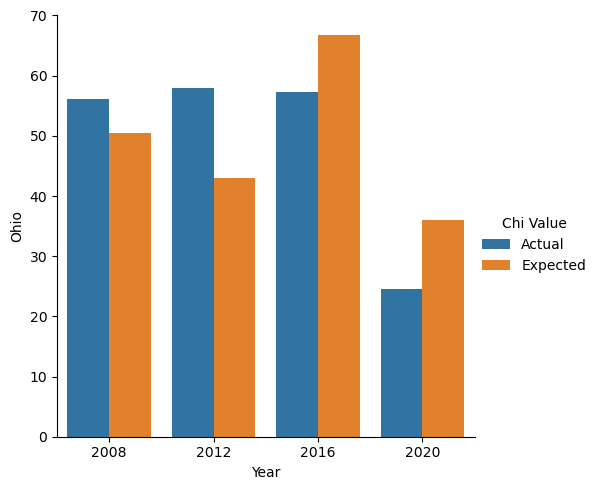

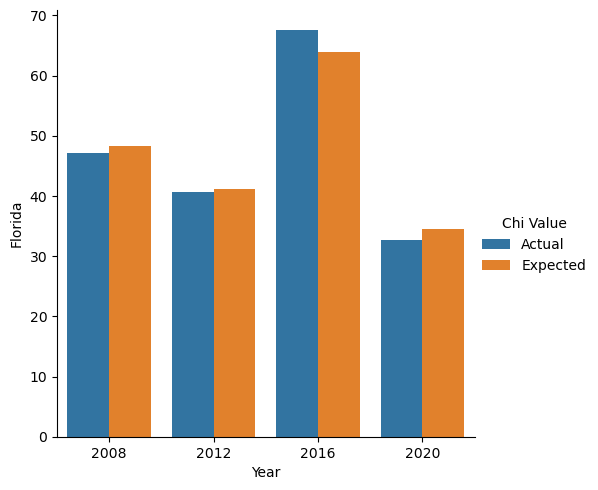

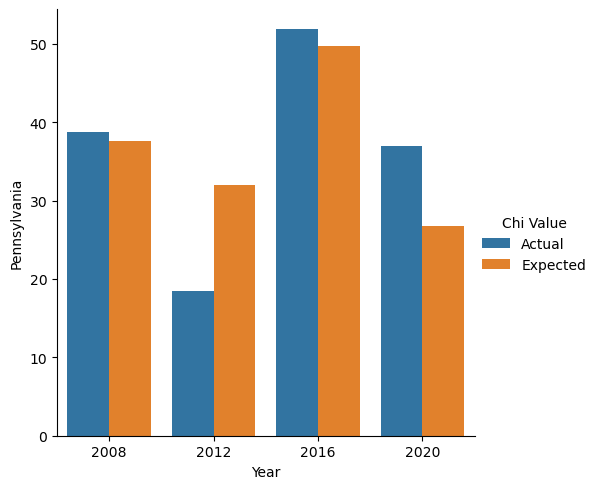

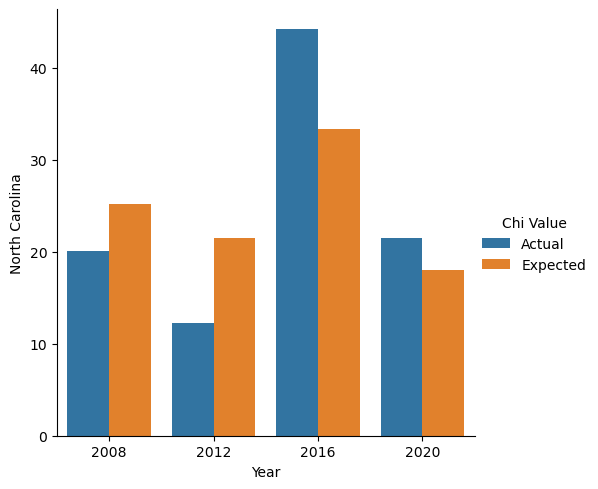

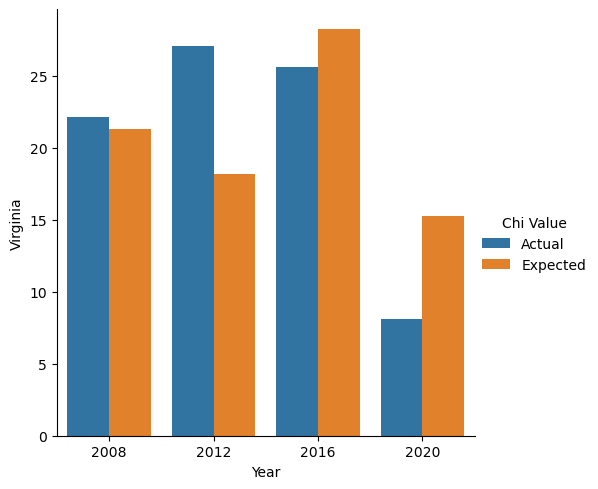

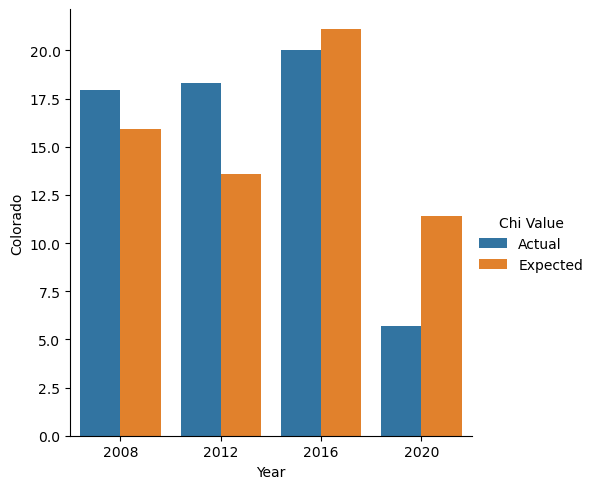

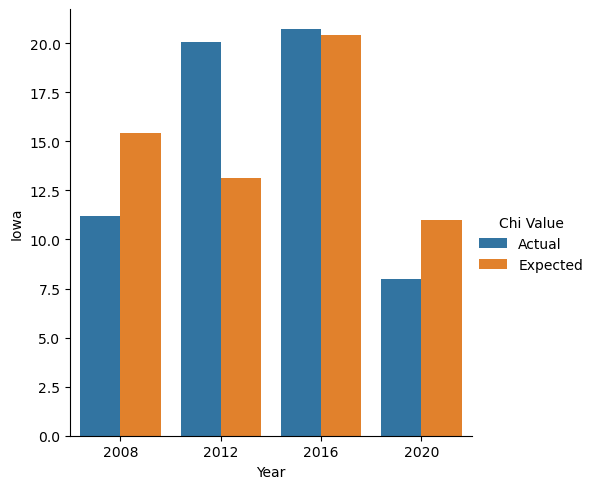

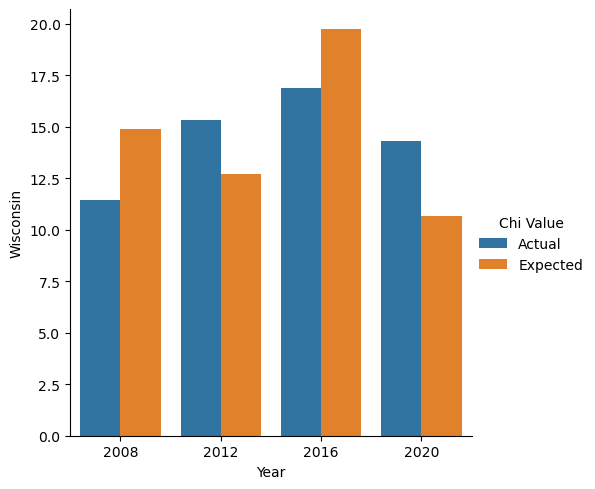

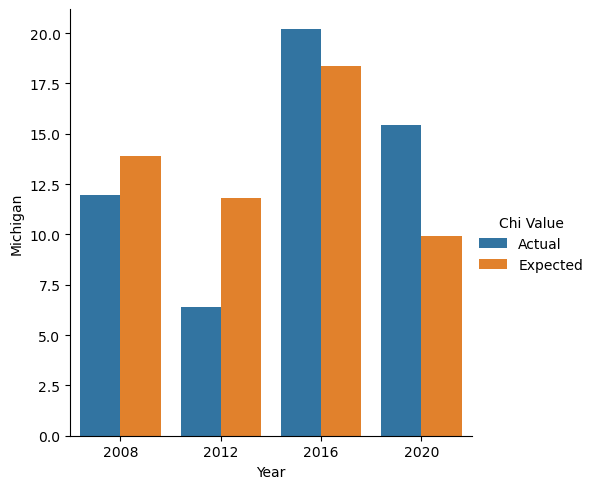

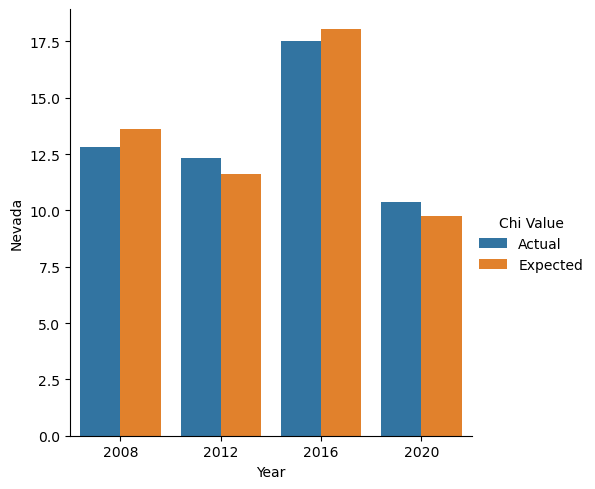

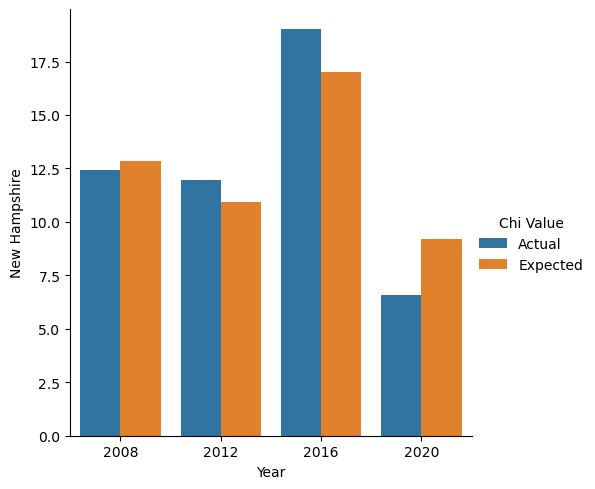

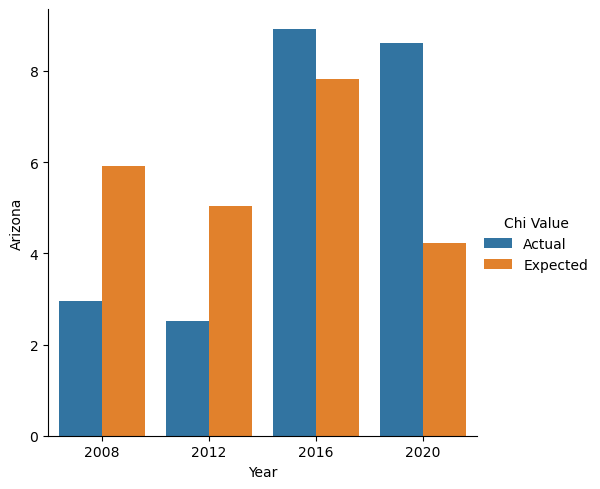

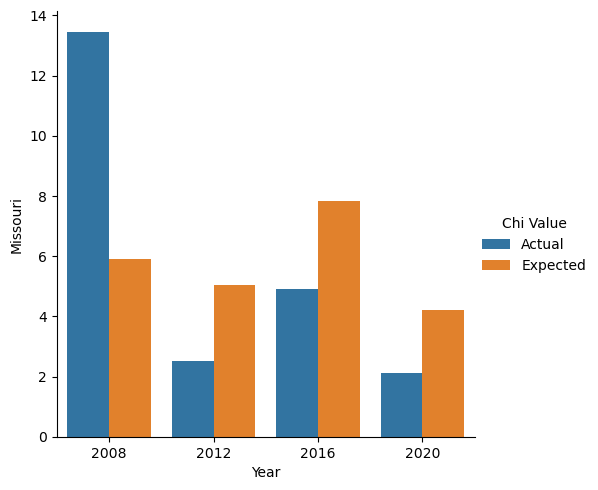

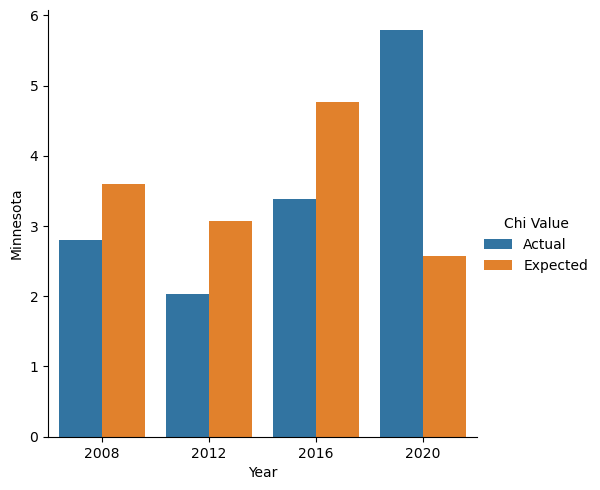

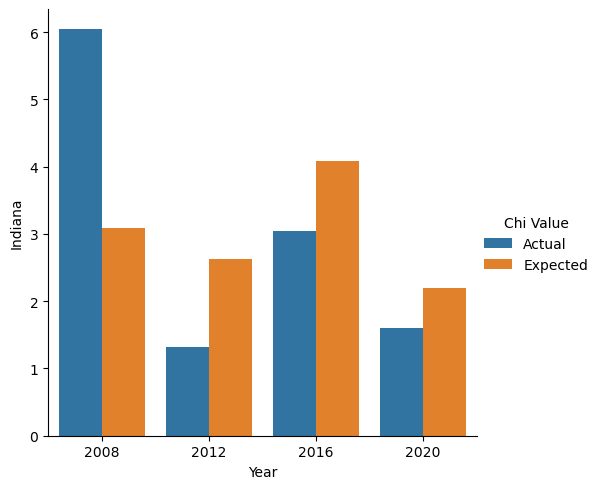

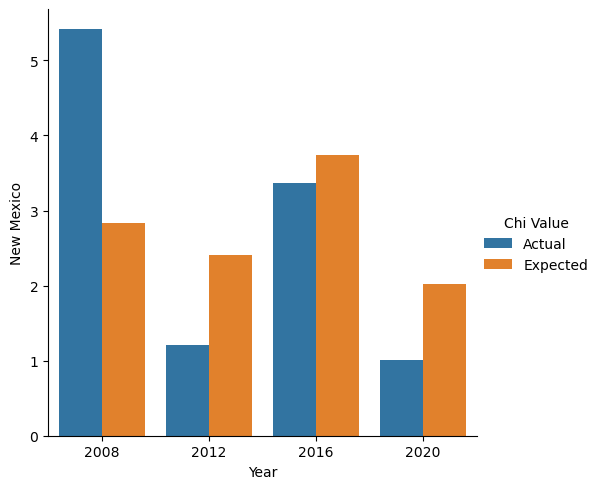

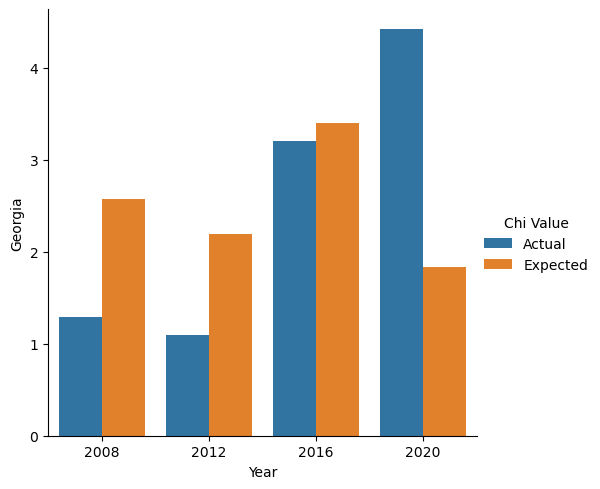

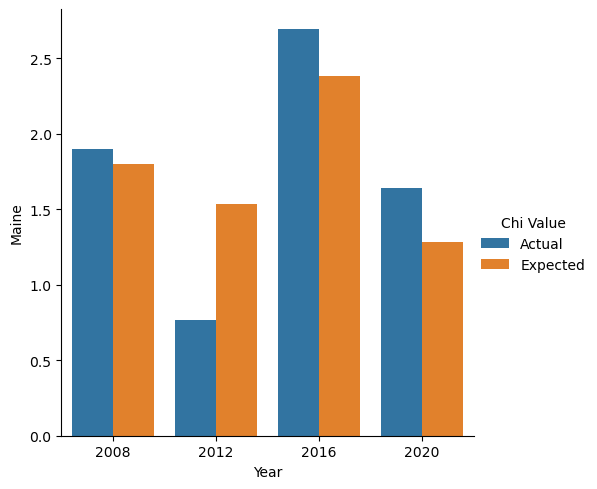

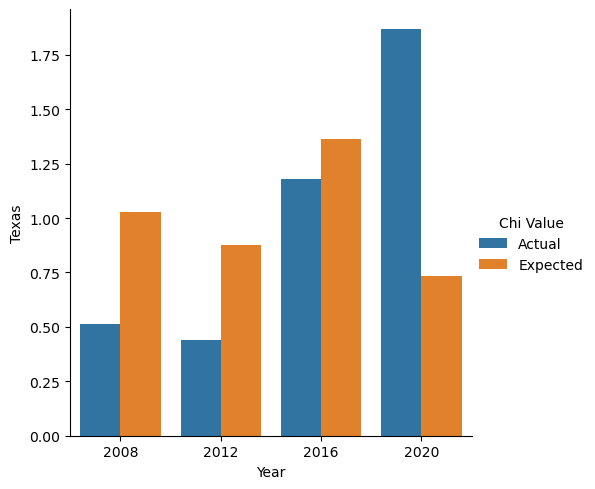

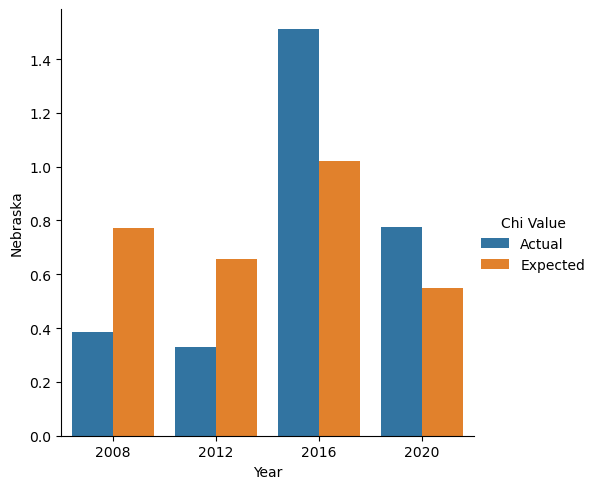

In [251]:

for state in chi_square_val_visited.index:
    chi_reorg = chi_square_val_visited.loc[state,:].reset_index()
    chi_reorg[["Year", "chi"]] = chi_reorg["index"].str.split("_", expand = True)
    chi_reorg = chi_reorg.drop(columns = "index")

    actual_reorg = campaign_events.loc[state,:].iloc[0:4].reset_index()
    actual_reorg[["Year", "chi"]] = actual_reorg["index"].str.split(" ", expand = True)
    actual_reorg = actual_reorg.drop(columns = "index")

    chi_and_actual = pd.concat([chi_reorg, actual_reorg])
    chi_and_actual["Chi Value"] = chi_and_actual["chi"].transform(lambda x: "Expected" if x == "chi" else "Actual")
    sns.catplot(chi_and_actual, x = "Year", y = state, kind = "bar", hue = "Chi Value", ci = None)